In [ ]:
import sys
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sys.path.append('../')

from src.data_loader import DataLoader

dl = DataLoader()
df = dl.data_raw

In [ ]:
df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


In [ ]:
df.shape

(2900, 8)

Check for missing values count and ratio in dataset 

In [ ]:
df.isnull().sum()

Time_spent_Alone             63
Stage_fear                   73
Social_event_attendance      62
Going_outside                66
Drained_after_socializing    52
Friends_circle_size          77
Post_frequency               65
Personality                   0
dtype: int64

In [ ]:
df.isnull().mean()*100

Time_spent_Alone             2.172414
Stage_fear                   2.517241
Social_event_attendance      2.137931
Going_outside                2.275862
Drained_after_socializing    1.793103
Friends_circle_size          2.655172
Post_frequency               2.241379
Personality                  0.000000
dtype: float64

Check ratio of personality labels in dataset

In [ ]:
df.Personality.value_counts()

Personality
Extrovert    1491
Introvert    1409
Name: count, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2837 non-null   float64
 1   Stage_fear                 2827 non-null   object 
 2   Social_event_attendance    2838 non-null   float64
 3   Going_outside              2834 non-null   float64
 4   Drained_after_socializing  2848 non-null   object 
 5   Friends_circle_size        2823 non-null   float64
 6   Post_frequency             2835 non-null   float64
 7   Personality                2900 non-null   object 
dtypes: float64(5), object(3)
memory usage: 181.4+ KB


In [23]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time_spent_Alone,2837.0,4.505816,3.479192,0.0,2.0,4.0,8.0,11.0
Social_event_attendance,2838.0,3.963354,2.903827,0.0,2.0,3.0,6.0,10.0
Going_outside,2834.0,3.000000,2.247327,0.0,1.0,3.0,5.0,7.0
Friends_circle_size,2823.0,6.268863,4.289693,0.0,3.0,5.0,10.0,15.0
Post_frequency,2835.0,3.564727,2.926582,0.0,1.0,3.0,6.0,10.0


In [13]:
data = dl.get_data_imputed()

cols = data.columns
num_cols = [x for x in data.columns if data[x].dtypes != 'O']
cat_cols = [y for y in cols if y not in num_cols]

data

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.000000,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.000000,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.000000,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.000000,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.000000,No,8.0,5.0,Extrovert
...,...,...,...,...,...,...,...,...
2895,3.0,No,7.0,6.000000,No,6.0,6.0,Extrovert
2896,3.0,No,8.0,3.000000,No,14.0,9.0,Extrovert
2897,4.0,Yes,1.0,1.000000,Yes,4.0,0.0,Introvert
2898,11.0,Yes,1.0,1.272859,Yes,2.0,0.0,Introvert


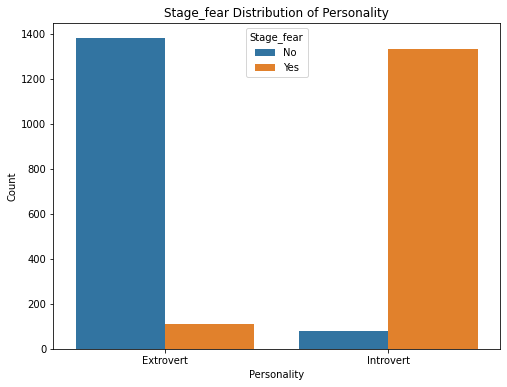

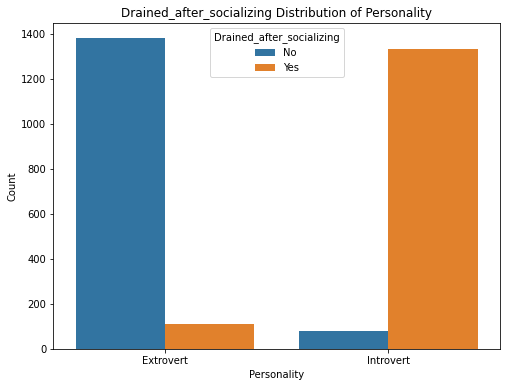

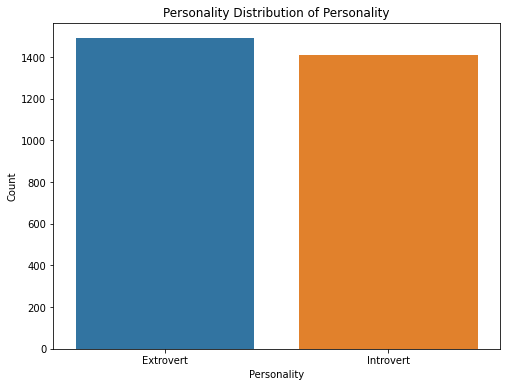

In [18]:
for col in cat_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(x='Personality', data=data, hue=col)
    plt.title(f'{col} Distribution of Personality')
    plt.xlabel('Personality')
    plt.ylabel('Count')
    plt.show()

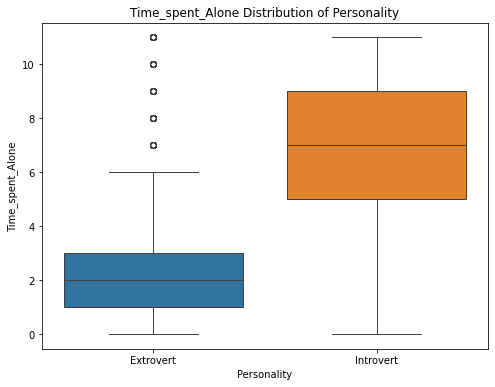

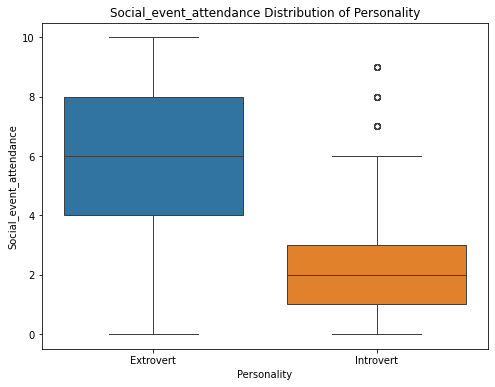

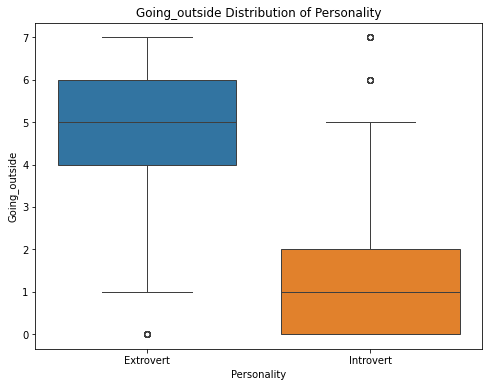

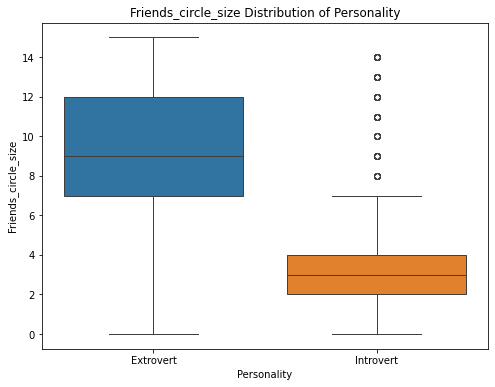

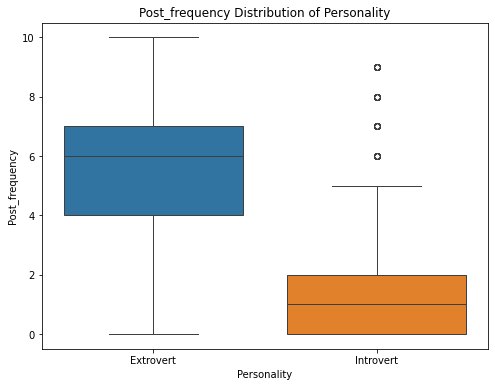

In [16]:
for col in num_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Personality', y=col, data=data, hue='Personality')
    plt.title(f'{col} Distribution of Personality')
    plt.xlabel('Personality')
    plt.ylabel(col)
    plt.show()

Text(0.5, 1.02, 'Pair Plot of Numeric Features by Personality')

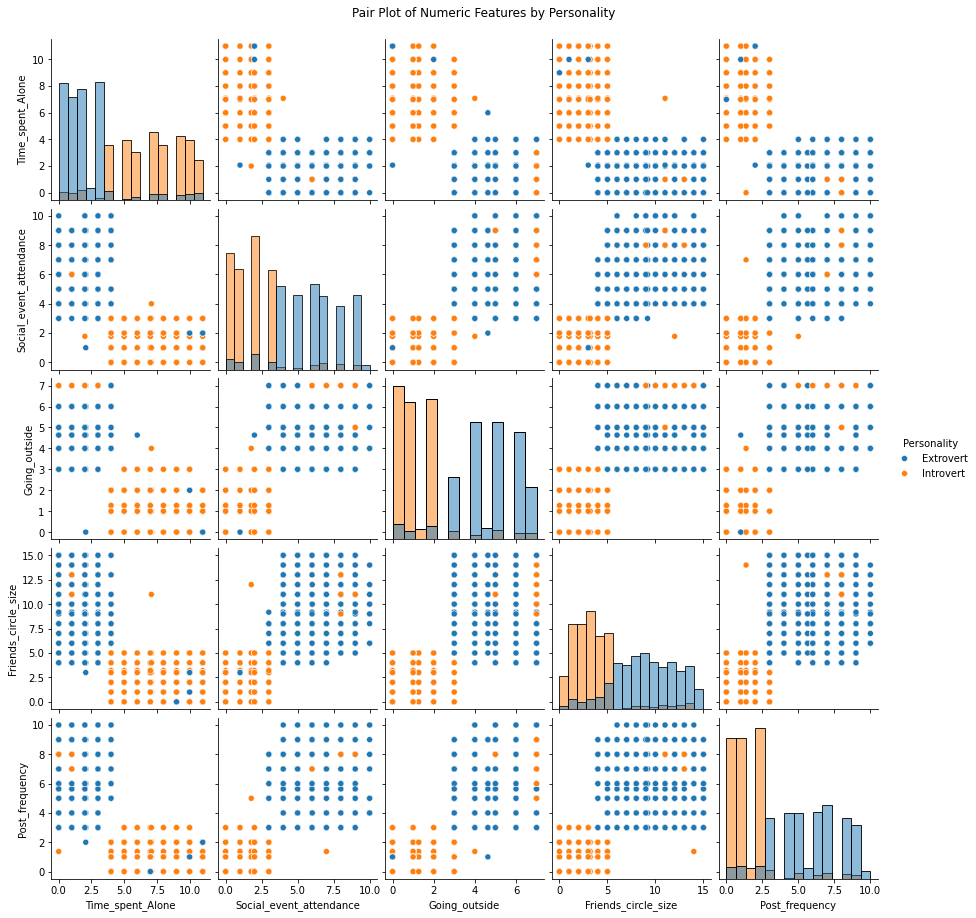

In [19]:
sns.pairplot(data[num_cols + ['Personality']], hue='Personality', diag_kind='hist')
plt.suptitle('Pair Plot of Numeric Features by Personality', y=1.02)

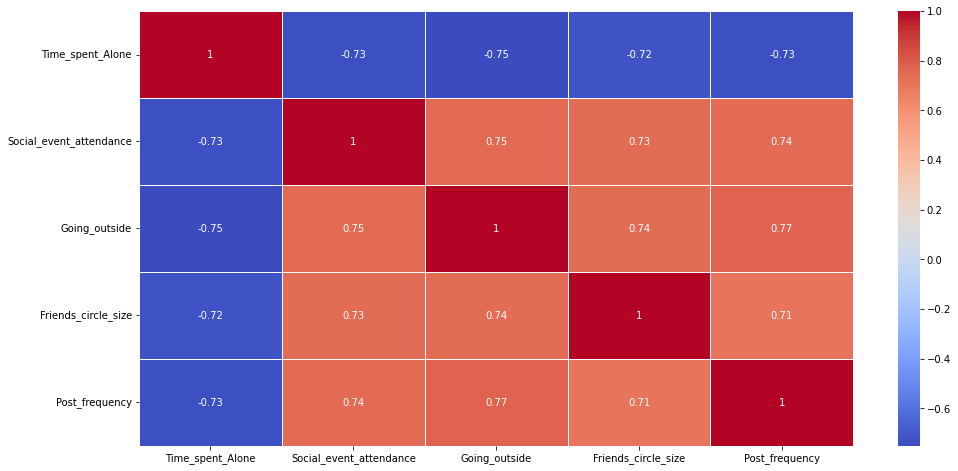

In [26]:
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(numeric_only=True),cmap='coolwarm',annot=True,linewidths=0.75)
plt.show()